# target defender

Suppose there are 4 cars, A, B, C, and D. D is chased by A, C is chased by B, B is chased by D. C is
moving independently parallel to the y-axis. Initial positions of A, B, C, and D are (10,0), (0,10),
(10,10) and (0,0). 

Velocities of A, B, C, and D are 3, 5, 7, and 2 ms-1.

Now Simulate this Chase Problem for t=20 unit time. Print the x and y coordinate value of each
vehicle at every time step. If the distance between any 2 vehicles is less than 5 m then a car will
shoot its target [not destroy]. 

Print all the shootings and finally print the number of times each
car got shot during the simulation.
Also, draw the graph showing the path of each car

In [ ]:
import matplotlib.pyplot as plt
import math

In [ ]:
def distance(Dx, Dy, Tx, Ty):
    return math.sqrt((Tx-Dx)**2 + (Ty- Dy)**2)

In [ ]:
#defender target 
def singleChase(Dx, Dy, Tx, Ty, S):
    dist = distance(Dx, Dy, Tx, Ty)
    sin = (Ty - Dy)/dist
    cos = (Tx - Dx)/dist
    new_xd = Dx + S * cos
    new_yd = Dy + S * sin
    return new_xd, new_yd

In [ ]:
Ax = [10]
Ay = [0]

Bx = [0]
By = [10]

Cx = [10]
Cy = [10]

Dx = [0]
Dy = [0]

Va = 3
Vb = 5
Vc = 7
Vd = 2

T = 20

Ashot = 0
Bshot = 0
Cshot = 0
Dshot = 0

-------------------------------------------------


T :  0 

Ax:  10 	Ay:  0
Bx:  0 		By:  10
Cx:  10 	Cy:  10
Dx:  0 		Dy:  0


-------------------------------------------------


T :  1 

Ax:  7.0 	Ay:  0.0
Bx:  5.0 	By:  10.0
Cx:  0 				Cy:  17
Dx:  0.0 	Dy:  2.0


-------------------------------------------------


T :  2 

Ax:  4.115428157077531 	Ay:  0.8241633836921343
Bx:  2.0938090314045175 	By:  14.068667356033675
Cx:  0 				Cy:  24
Dx:  1.05999788000636 	Dy:  3.695996608010176

A shot D


-------------------------------------------------


T :  3 

Ax:  1.9294483115273606 	Ay:  2.878790385083982
Bx:  1.0623404892977046 	By:  18.961117932855483
Cx:  0 				Cy:  31
Dx:  1.2583488056729006 	Dy:  5.686136530298865

A shot D


-------------------------------------------------


T :  4 

Ax:  1.2319473187049241 	Ay:  5.796579336501084
Bx:  0.6228360556488804 	By:  23.941764060899818
Cx:  0 				Cy:  38
Dx:  1.2288215396368511 	Dy:  7.685918553560509

A shot D


----------------------

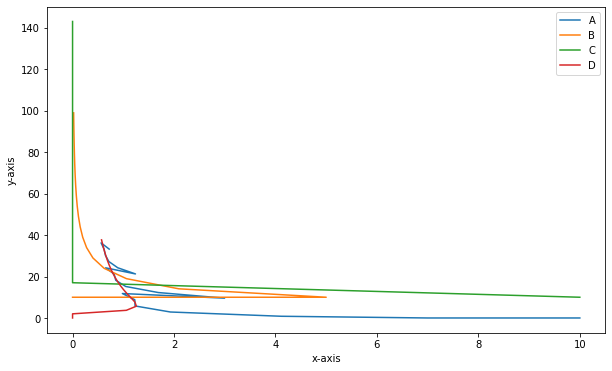

In [ ]:
print("-------------------------------------------------\n\n")
print("T : ", 0 , "\n")
print("Ax: ",Ax[0], "\tAy: ", Ay[0])
print("Bx: ",Bx[0], "\t\tBy: ", By[0])
print("Cx: ", Cx[0], "\tCy: ", Cy[0])
print("Dx: ", Dx[0], "\t\tDy: ", Dy[0])


for t in range(1, T):

    print("\n\n-------------------------------------------------\n\n")
    print("T : ", t , "\n")
    # D is chased by A (Defender = A and Target = D)
    new_ax, new_ay = singleChase(Ax[t-1], Ay[t-1], Dx[t-1], Dy[t-1], Va)
    Ax.append(new_ax)
    Ay.append(new_ay)
    
    # C is chased by B (Defender = B and Target = C)
    new_bx, new_by = singleChase(Bx[t-1], By[t-1], Cx[t-1], Cy[t-1], Vb)
    Bx.append(new_bx)
    By.append(new_by)

    # B is chased by D (Defender = D and Target = B)
    new_dx, new_dy = singleChase(Dx[t-1], Dy[t-1], Bx[t-1], By[t-1], Vd)
    Dx.append(new_dx)
    Dy.append(new_dy)
   
    #C is parallel to y axis(x if fixed)
    Cx.append(0)
    Cy.append(Cy[t-1]+Vc)

    # all asix print
    print("Ax: ",new_ax, "\tAy: ", new_ay)
    print("Bx: ",new_bx, "\tBy: ", new_by)
    print("Cx: ", Cx[t], "\t\t\t\tCy: ", Cy[t])
    print("Dx: ", new_dx, "\tDy: ", new_dy)

    dist_AD = distance(Ax[t], Ay[t], Dx[t], Dy[t])
    dist_BC = distance(Bx[t], By[t], Cx[t], Cy[t])
    dist_DB = distance(Dx[t], Dy[t], Bx[t], By[t])

    if dist_AD < 5:
        Dshot +=1
        print("\nA shot D")

    if dist_BC < 5:
        Cshot +=1
        print("\nB shot C")
    
    if dist_DB < 5:
        Bshot +=1
        print("\nD shot B")
        
    if(dist_AD == 0 or dist_BC == 0 or dist_DB == 0):
        print("Distance is Zero So hit. it make error division by zero")
        break



print("\n\n-------------------------------------------------\n\n")
print("Car got shot\n\n")
print("A got shot: ",Ashot)
print("B got shot: ",Bshot)
print("C got shot: ",Cshot)
print("D got shot: ",Dshot)


# all the ploting
plt.plot(Ax, Ay, label = "A")
plt.plot(Bx, By, label = "B")
plt.plot(Cx, Cy, label = "C")
plt.plot(Dx, Dy, label = "D")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.rcParams['figure.figsize'] = (10,6)
plt.legend()
plt.show()